## Cargando nuestra sesion

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd drive/'My Drive'/Clases_DS_prueba/TitanicNotebook

In [24]:
import dill
dill.load_session('Titanic01.db')

In [25]:
train['P_embarque'].fillna(2,inplace=True)

## Recordando las variables

In [26]:
train.head()

,Sobrevivio,Pclass,Genero,Edad,Hermanos,Padres_hijos,Tarifa,P_embarque,Miembros_de_fam,Viaja_solo,es_niño
0,0,3,0,0.022824,1,0,0.006032,2.0,2,0,0
1,1,1,2,0.039423,1,0,0.059304,1.0,2,0,0
2,1,3,2,0.026974,0,0,0.006593,2.0,1,1,0
3,1,1,2,0.036311,1,0,0.044176,2.0,2,0,0
4,0,3,0,0.036311,0,0,0.006697,2.0,1,1,0


In [27]:
summit.head()

,Pclass,Genero,Edad,Hermanos,Padres_hijos,Tarifa,P_embarque,Miembros_de_fam,Viaja_solo,es_niño
0,3,0,0.051826,0,0,0.007803,0,1,1,0
1,3,2,0.070603,1,0,0.006977,2,2,1,0
2,2,0,0.093136,0,0,0.009656,0,1,1,0
3,3,0,0.040559,0,0,0.008634,2,1,1,0
4,3,2,0.033048,1,1,0.012247,2,3,1,0


# Machine Learning

-Logistic regression vs SVM

Importaremos de esta manera los archivos csv donde encontraremos la data que nos interesa. Se puede observar que tenemos dos conjuntos de datos: **train** y **test**. Esto es porque el **objetivo** es hacer un modelo de aprendizaje automático (machine learning), específicamente uno supervizado que nos prediga si el pasajero **sobrevive** o **no sobrevive**. Se divide la data porque cierto grupo de datos nos servirá para **entrenar** el modelo y el otro grupo de datos para **testearlo**. Luego de hacer el respectivo testeo del modelo podremos mandarlo a producción, es decir, que interactúe con data real.    

In [28]:
X_train = train.drop('Sobrevivio',axis=1)
y_train = train['Sobrevivio']
X_test_final = summit

### Dividiremos nuestra data para poder entrenar y evaluar nuestros modelos.

In [29]:
#Dense cuenta de que se importa desde model_selection, porque efectivamente sirve para poder seleccionar nuestros modelos
from sklearn.model_selection import train_test_split

In [30]:
#Dividing the data before tuning the model
X_train, X_test, y_train, y_test= train_test_split(X_train,y_train,test_size = 0.3, 
                                                    random_state=21)

In [42]:
#Explorar los nuevos datos partidos

- Los pasos para entrenar un modelo son simples: Fitear y predecir. Nada más. Luego haremos algunas métricas para poder ver qué tan bien nos ha servido nuestro clasificador. 

### Regresión Logística con Python. 

La famosa Regresión Logística es el modelo más básico (y no le quita lo poderoso) de los modelos disponibles dentro de la librería scikit learn. Veamos como podemos ponerlo a prueba. 

In [31]:
from sklearn.linear_model import LogisticRegression
#Logistic Regression:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

C:\Users\pablo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

- Una vez hecho el fiteo de los datos. Tenemos nuestro modelo **almacenado** y **entrenado** en la variable **LogReg** 

### Clasificador de Árbol de Decisión (Decision Tree Classifier) 

In [ ]:
# Si están en Colab. Corran este código 
!pip install graphviz

In [43]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz #Para poder ver mi árbol
from sklearn.metrics import accuracy_score #Para poder medir mi accuracy

In [44]:
#Entreno mi árbol
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
tree_y_predict = tree_clf.predict(X_test)

print('Mi árbol tiene un accuracy de: ', accuracy_score(y_test,tree_y_predict))

Mi árbol tiene un accuracy de:  0.7723880597014925


- Pero aún podemos mejorar nuestro árbol testeando **solo uno** de sus parámetros:

In [80]:
for i in range(1,18):
    tree_clf = DecisionTreeClassifier(max_depth=i)
    tree_clf.fit(X_train,y_train)
    y_pred = tree_clf.predict(X_test)
    print("Mi árbol da un accuracy de:", accuracy_score(y_test,y_pred), "cuando su max_depth es: ", i)

Mi árbol da un accuracy de: 0.7873134328358209 cuando su max_depth es:  1
Mi árbol da un accuracy de: 0.8022388059701493 cuando su max_depth es:  2
Mi árbol da un accuracy de: 0.832089552238806 cuando su max_depth es:  3
Mi árbol da un accuracy de: 0.8059701492537313 cuando su max_depth es:  4
Mi árbol da un accuracy de: 0.8097014925373134 cuando su max_depth es:  5
Mi árbol da un accuracy de: 0.7873134328358209 cuando su max_depth es:  6
Mi árbol da un accuracy de: 0.7947761194029851 cuando su max_depth es:  7
Mi árbol da un accuracy de: 0.7835820895522388 cuando su max_depth es:  8
Mi árbol da un accuracy de: 0.7985074626865671 cuando su max_depth es:  9
Mi árbol da un accuracy de: 0.8097014925373134 cuando su max_depth es:  10
Mi árbol da un accuracy de: 0.7985074626865671 cuando su max_depth es:  11
Mi árbol da un accuracy de: 0.8022388059701493 cuando su max_depth es:  12
Mi árbol da un accuracy de: 0.7947761194029851 cuando su max_depth es:  13
Mi árbol da un accuracy de: 0.78358

###### Entonces vamos a elegir el resultado que haga a nuestro modelo algo mejor :) 

In [85]:
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [86]:
y_pred_tree = tree_clf.predict(X_test)

## Matriz de confusión:

Cuenta el número de veces en que las predicciones hechas caen en **error tipo 1** y **error tipo 2**. Así como también cuenta las buenas predicciones que ha hecho nuestro modelo. 

- **Error tipo1**: De manera errónea se predijo 1 cuando en realidad es 0. Es decir, nuestro algoritmo nos dijo que una personas sobrevivió cuando en realidad estaba muerta.

- **Error tipo2**: De manera errónea se predijo 0 cuando en realidad es 1. Nuestro modelo nos dice que una persona ha muerto cuando en realidad ha sobrevivido.

- **True Positive(Verdadero Positivo)**: Nos dice que es 1 cuando efectivamente es 1. Predice de manera correcta la supervivencia.

- **False Negative (Falso Negativo)**: Nos dice que es 0 cuando de verdad es 0. Cuántos casos predice de manera correcta la no-supervivencia. 


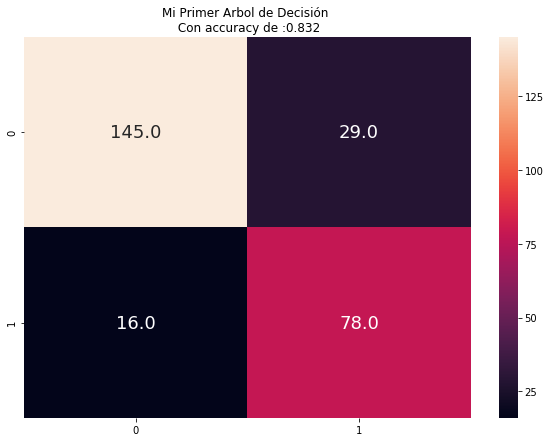

In [122]:
#Plotearemos una matriz de confusión
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_pred_tree,y_test) #Creo la matriz de confusón así de fácil

plt.figure(figsize=(10,7))

plt.title('Mi Primer Arbol de Decisión \n Con accuracy de :{0:.3f}'.format(accuracy_score(y_test, y_pred_tree)))
plt.xlabel('Nuestra data nos ha dicho que')
plt.ylabel('Nuestro algoritmo dice que')
sns.heatmap(conf_matrix, annot = True, annot_kws={"size": 18}, fmt=".1f")

In [125]:
#Y si no me creen...
#Confirmemos efectivamente lo que nuestra data nos dice:
y_test[y_test == 1].sum()

107

## Una evolución de los Árboles de Decisión: Bosques Aleatorios (Random Forest)

- Un RandomForest es un agregado de árboles de decisiones, donde cada uno de estos árboles se entrena con diferentes partes de la data escogida de manera aleatoria. Luego de tener una cierta cantidad de árboles (500 en el ejemplo) se hace una votación para hacer cada predicción.  

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
#Random Forest Classifier model
rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1)
rnd_clf.fit(X_train,y_train)

#Predicting
y_pred = rnd_clf.predict(X_test)

#Evaluate the accuracy score
print("El accuracy de mi RandomForest es:", accuracy_score(y_pred,y_test))

El accuracy de mi RandomForest es: 0.835820895522388


- Una de las mayores ventajas de entrenar un árbol de decisión y mejor aún un random forest, es que podemos ver cuáles son nuestras variables más importantes. 

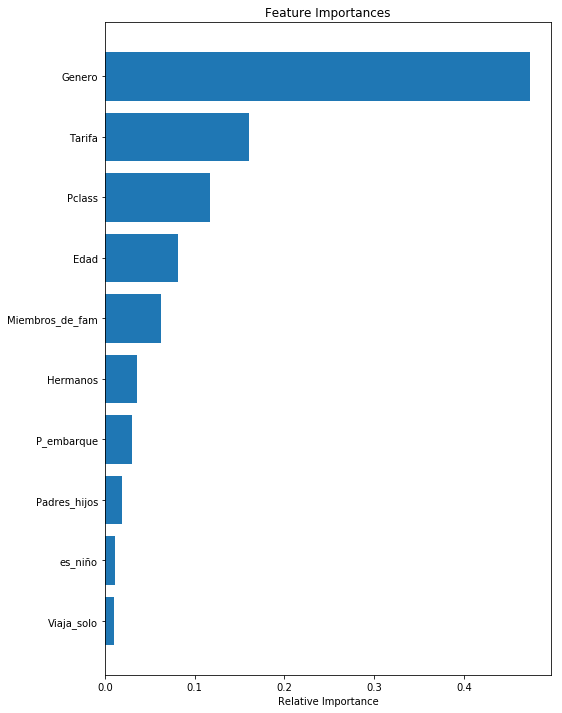

In [130]:
#Saquemos los valores más importantes 
importances = rnd_clf.feature_importances_
cols = X_train.columns
plt.figure(figsize=(8,12))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align = 'center')
plt.yticks(range(len(indices)),[cols[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
#We will now try an ensemble method
voting_clf = VotingClassifier(estimators = [('lr',searcher),('rf',rnd_clf),('svc',ssp),
                                            ('sgd',searcher_sgd),('dt',tree_clf)],
                             voting = 'hard')
voting_clf.fit(X_train,y_train)

In [53]:
y_pred = voting_clf.predict(X_test)

In [54]:
#Evaluate the accuracy score
print("summitaccuracy of the Decision Trees model:", accuracy_score(y_pred,y_test))
pred = voting_clf.predict(X_test_final)

Test accuracy of the Decision Trees model: 0.8208955223880597


In [62]:
preds = model.predict(X_test)

In [8]:
sub = pd.read_csv('gender_submission.csv')

In [10]:
sub['Survived'] = pred

In [17]:
sub.to_csv('submission.csv')

In [14]:
sub.index = sub.PassengerId

In [16]:
sub.drop('PassengerId',axis=1)

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
897,0
898,1
899,0
900,1
